# 1. Sample Data and Non-Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1500, random_state=170)

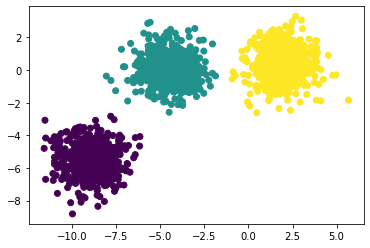

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=label)

# 2. K-Means

### 2.1 If the number of clusters is matched

In [4]:
from sklearn.cluster import KMeans

correct_kmeans = KMeans(n_clusters=3)

In [5]:
correct_kmeans.fit(data)

KMeans(n_clusters=3)

In [6]:
correct_pred = correct_kmeans.predict(data)
correct_kmeans.cluster_centers_

array([[-4.55490993,  0.02920864],
       [ 1.91176144,  0.40634045],
       [-8.94137566, -5.48137132]])

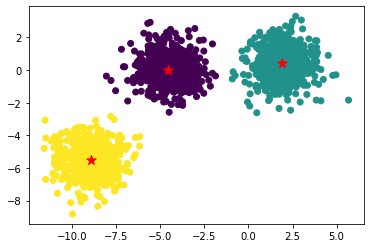

In [7]:
correct_center = correct_kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=correct_pred)
plt.scatter(correct_center[:, 0], correct_center[:, 1], marker="*", s=100, color="red")

### 2.2 Incorrect number of clusters

#### 2.2.1 When the number is small

In [8]:
small_kmeans = KMeans(n_clusters=2)

small_kmeans.fit(data)

KMeans(n_clusters=2)

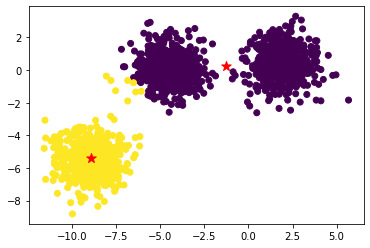

In [9]:
small_pred = small_kmeans.predict(data)
small_center = small_kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=small_pred)
plt.scatter(small_center[:, 0], small_center[:, 1], marker="*", s=100, color="red")

#### 2.2.2 If the number is large

In [10]:
large_kmeans = KMeans(n_clusters=4)

large_kmeans.fit(data)

KMeans(n_clusters=4)

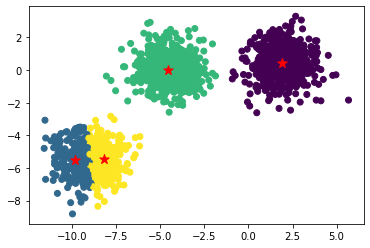

In [11]:
large_pred = large_kmeans.predict(data)
large_center = large_kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=large_pred)
plt.scatter(large_center[:, 0], large_center[:, 1], marker="*", s=100, color="red")

### 2.3 Find the appropriate K

In [12]:
sse_per_n = []

for n in range(1, 12, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    sse = kmeans.inertia_
    sse_per_n += [sse]

Text(0.5, 1.0, 'Sum of Sqaured Error')

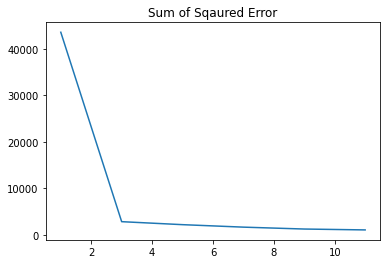

In [13]:
plt.plot(range(1, 12, 2), sse_per_n)
plt.title("Sum of Sqaured Error")

# 3. the limits of K Means

### 3.1 clusters of different sizes

In [14]:
size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

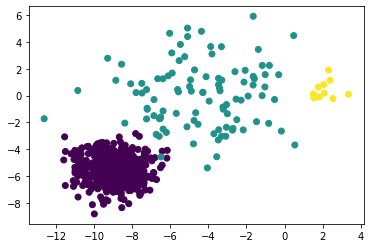

In [15]:
size_data = np.vstack(
    (size_data[size_label == 0][:500],
     size_data[size_label == 1][:100],
     size_data[size_label == 2][:10])
)
size_label = [0] * 500 + [1] * 100 + [2] * 10

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_label)

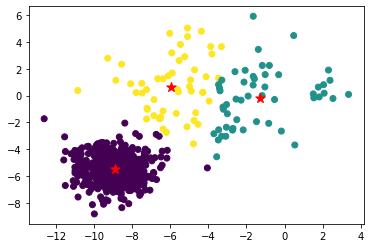

In [16]:
size_kmeans = KMeans(n_clusters=3, random_state=2021)

size_pred = size_kmeans.fit_predict(size_data)
size_center = size_kmeans.cluster_centers_

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_center[:, 0], size_center[:, 1], marker="*", s=100, color="red")

### 3.2 clusters of different densities

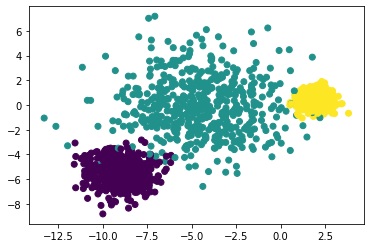

In [17]:
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_label)

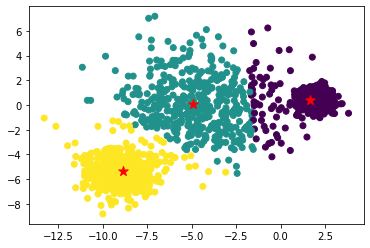

In [18]:
density_kmeans = KMeans(n_clusters=3, random_state=2021)

density_pred = density_kmeans.fit_predict(density_data)
density_center = density_kmeans.cluster_centers_

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_center[:, 0], density_center[:, 1], marker="*", s=100, color="red")

### 3.3 clusters with regional patterns

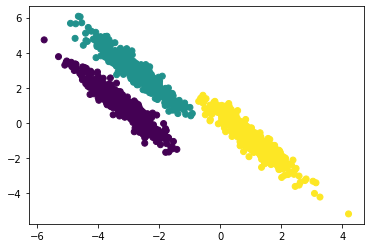

In [19]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
pattern_data = np.dot(data, transformation)

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=label)

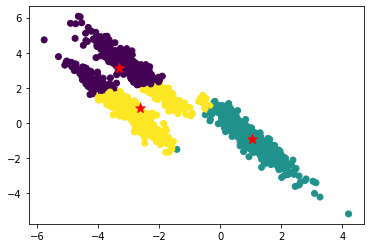

In [20]:
pattern_kmeans = KMeans(n_clusters=3, random_state=2021)

pattern_pred = pattern_kmeans.fit_predict(pattern_data)
pattern_center = pattern_kmeans.cluster_centers_

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_center[:, 0], pattern_center[:, 1], marker="*", s=100, color="red")

# 4. DBSCAN
- DBSCAN을 이용해 K MEANS 한계 있던 데이터에 적용

### 4.1 clusters of different sizes

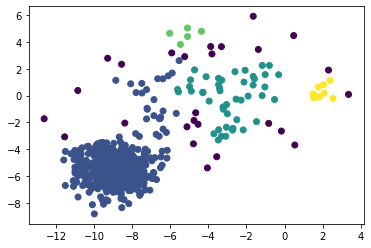

In [21]:
from sklearn.cluster import DBSCAN

size_dbscan = DBSCAN(eps=1.0)
size_db_pred = size_dbscan.fit_predict(size_data)

plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred)

### 4.2 clusters of different densities

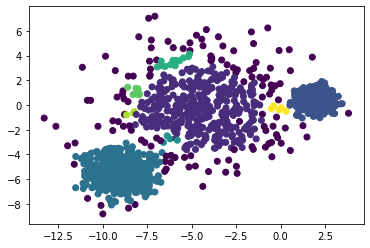

In [22]:
density_dbscan = DBSCAN()
density_db_pred = density_dbscan.fit_predict(density_data)

plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred)

### 4.3 clusters with regional patterns

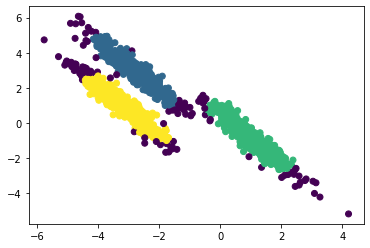

In [23]:
pattern_db = DBSCAN(eps=.3, min_samples=20)
pattern_db_pred = pattern_db.fit_predict(pattern_data)

plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred)